# Head pose

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('./DataLoader')

from DataLoader.Dataset import Dataset
import helpers
from helpers import imshow

from scipy.spatial.transform import Rotation as R

## Creation of a Dataset container

In [2]:
DATASET_PATH= './Data'
dp = Dataset(path=DATASET_PATH)[0]

## Head coordinates system

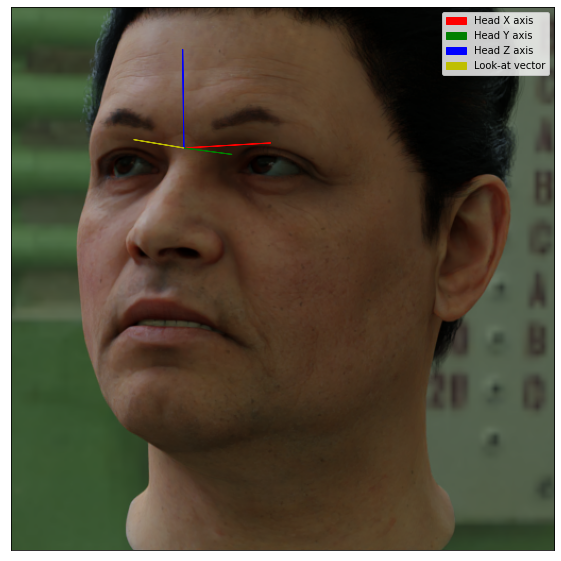

In [4]:
#TODO Improve arrow shape
world_to_img = lambda x : helpers.world_to_img(x, dp.intrinsic_matrix, dp.extrinsic_matrix)

arrow_length = 0.04

head_center_cam = world_to_img(dp.head_metadata.head_six_dof.location)
euler_angles = dp.head_metadata.head_rotation

# The coordinate system of the head is the columns of its rotation matrix
# The Euler angles convention is Roll(y axis) -> Pitch (x axis) -> Yaw (z axis)
head_axes_world = arrow_length * R.from_euler('yxz', [euler_angles[2], euler_angles[1], euler_angles[0]], degrees=True).as_matrix().T \
    + dp.head_metadata.head_six_dof.location
head_axes_img = world_to_img(head_axes_world)

look_at_cam = world_to_img(arrow_length * dp.head_metadata.head_six_dof.look_at_vector \
    + dp.head_metadata.head_six_dof.location)

imshow(dp.rgb_img)
plt.arrow(*head_center_cam, *(head_axes_img[0]- head_center_cam), color = 'r', label='Head X axis')
plt.arrow(*head_center_cam, *(head_axes_img[1]- head_center_cam),  color = 'g', label='Head Y axis')
plt.arrow(*head_center_cam, *(head_axes_img[2]- head_center_cam),  color = 'b', label='Head Z axis')
plt.arrow(*head_center_cam, *(look_at_cam- head_center_cam),  color = 'y', label='Look-at vector')
plt.legend()